In [1208]:
import pandas as pd
import seaborn as sns
import logging
import numpy as np


In [1209]:
import matplotlib.pyplot as plt
import math

In [1256]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.feature_selection import RFE

from sklearn.metrics import root_mean_squared_error

from sklearn.preprocessing import MinMaxScaler



In [1211]:
# pipline funtion

def read_data(filename):
    try:
        df = pd.read_csv(filename)
        if df.empty:
            raise ValueError("🚨 Data loaded but is empty.")
        return df
    except FileNotFoundError:
        raise FileNotFoundError("❌ Data file not found at specified path.")
    except Exception as e:
        raise RuntimeError(f"❌ Unexpected error while loading data: {e}")
    

In [1212]:
def print_infos(df):
    print("Data info : \n")
    display(df.info())

    print ("\n\nData describtion: \n")
    display(df.describe())


In [1213]:
def check_null(df):
    print(df.isnull().sum().sort_values(ascending=False))
    

In [1214]:
# pipline funtion

def intial_clean_data(df):
    cols_to_drop = ['instant', 'dteday' , 'registered', 'casual']
    df = df.drop(columns = cols_to_drop)
    return df

In [1215]:
def dispayl_histplot(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    n_cols = 4  
    n_rows = math.ceil(len(numeric_columns) / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        
    for i in range(len(numeric_columns), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [1216]:
def display_barplot(df, column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)

In [1217]:
def display_violinplot(df):
    plt.figure(figsize=(20, 15))
    
    # List of feature columns to compare with cnt
    columns_to_plot = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
                       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
    
    # Loop and plot each in a subplot
    for idx, col in enumerate(columns_to_plot):
        plt.subplot(4, 3, idx + 1)
        if df[col].nunique() < 10:
            # Categorical - use boxplot
            sns.violinplot(x=col, y='cnt', data=df)
        else:
            # Continuous - use scatterplot
            sns.scatterplot(x=col, y='cnt', data=df, alpha=0.5)
        plt.title(f'{col} vs cnt')
    
    plt.tight_layout()
    plt.show()

In [1218]:
def display_barplot_grid(df):
    display_barplot(df, 'yr')
    categorical_columns = df.select_dtypes(include=['category']).columns.tolist()
    n_cols = 2
    n_rows = len(categorical_columns)

    plt.figure(figsize=(14, 6 * n_rows))

    plot_index = 1
    print(categorical_columns)
    for col in categorical_columns:
        display_barplot(df, col)
    plt.tight_layout()
    plt.show()

In [1219]:
def display_corelation(df):
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(25, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Between Features')
    plt.tight_layout()
    plt.show()

In [1220]:
# pipline funtion

def convert_to_category_type(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            raise KeyError(f"Column '{col}' not found in DataFrame.")
    return df
    

In [1221]:
# pipline funtion

def convert_dummies(df):
    df = pd.get_dummies(df)
    return df
    

In [1222]:
# pipline funtion

def get_numeric_columns(df):
    return df.select_dtypes(include=['number']).columns.tolist()


In [1223]:
# pipeline funtion

def scale_num_data(df):
    scaler = MinMaxScaler()
    num_vars = get_numeric_columns(df)
    df[num_vars] = scaler.fit_transform(df[num_vars])


In [1224]:
# pipleline funciton
from sklearn.model_selection import train_test_split

def data_split(df, target_column='cnt', test_size=0.15, val_size=0.15, random_state=42):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # First, split off the test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Calculate validation size relative to remaining data
    val_relative_size = val_size / (1 - test_size)

    # Split the remaining into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_relative_size, random_state=random_state
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

    

In [1225]:
# pipleline cell

df = pd.read_csv("../data/hour.csv")
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [1226]:
print_infos(df)

Data info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None



Data describtion: 



,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [1227]:
# pipleline cell

check_null(df)

instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64


In [1228]:
# pipleline cell

df_copy = df.copy()

In [1229]:
df_copy

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [1230]:
# pipleline cell

df_copy = intial_clean_data(df_copy)

In [1231]:
df_copy

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [1232]:
print_infos(df_copy)

Data info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


None



Data describtion: 



,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


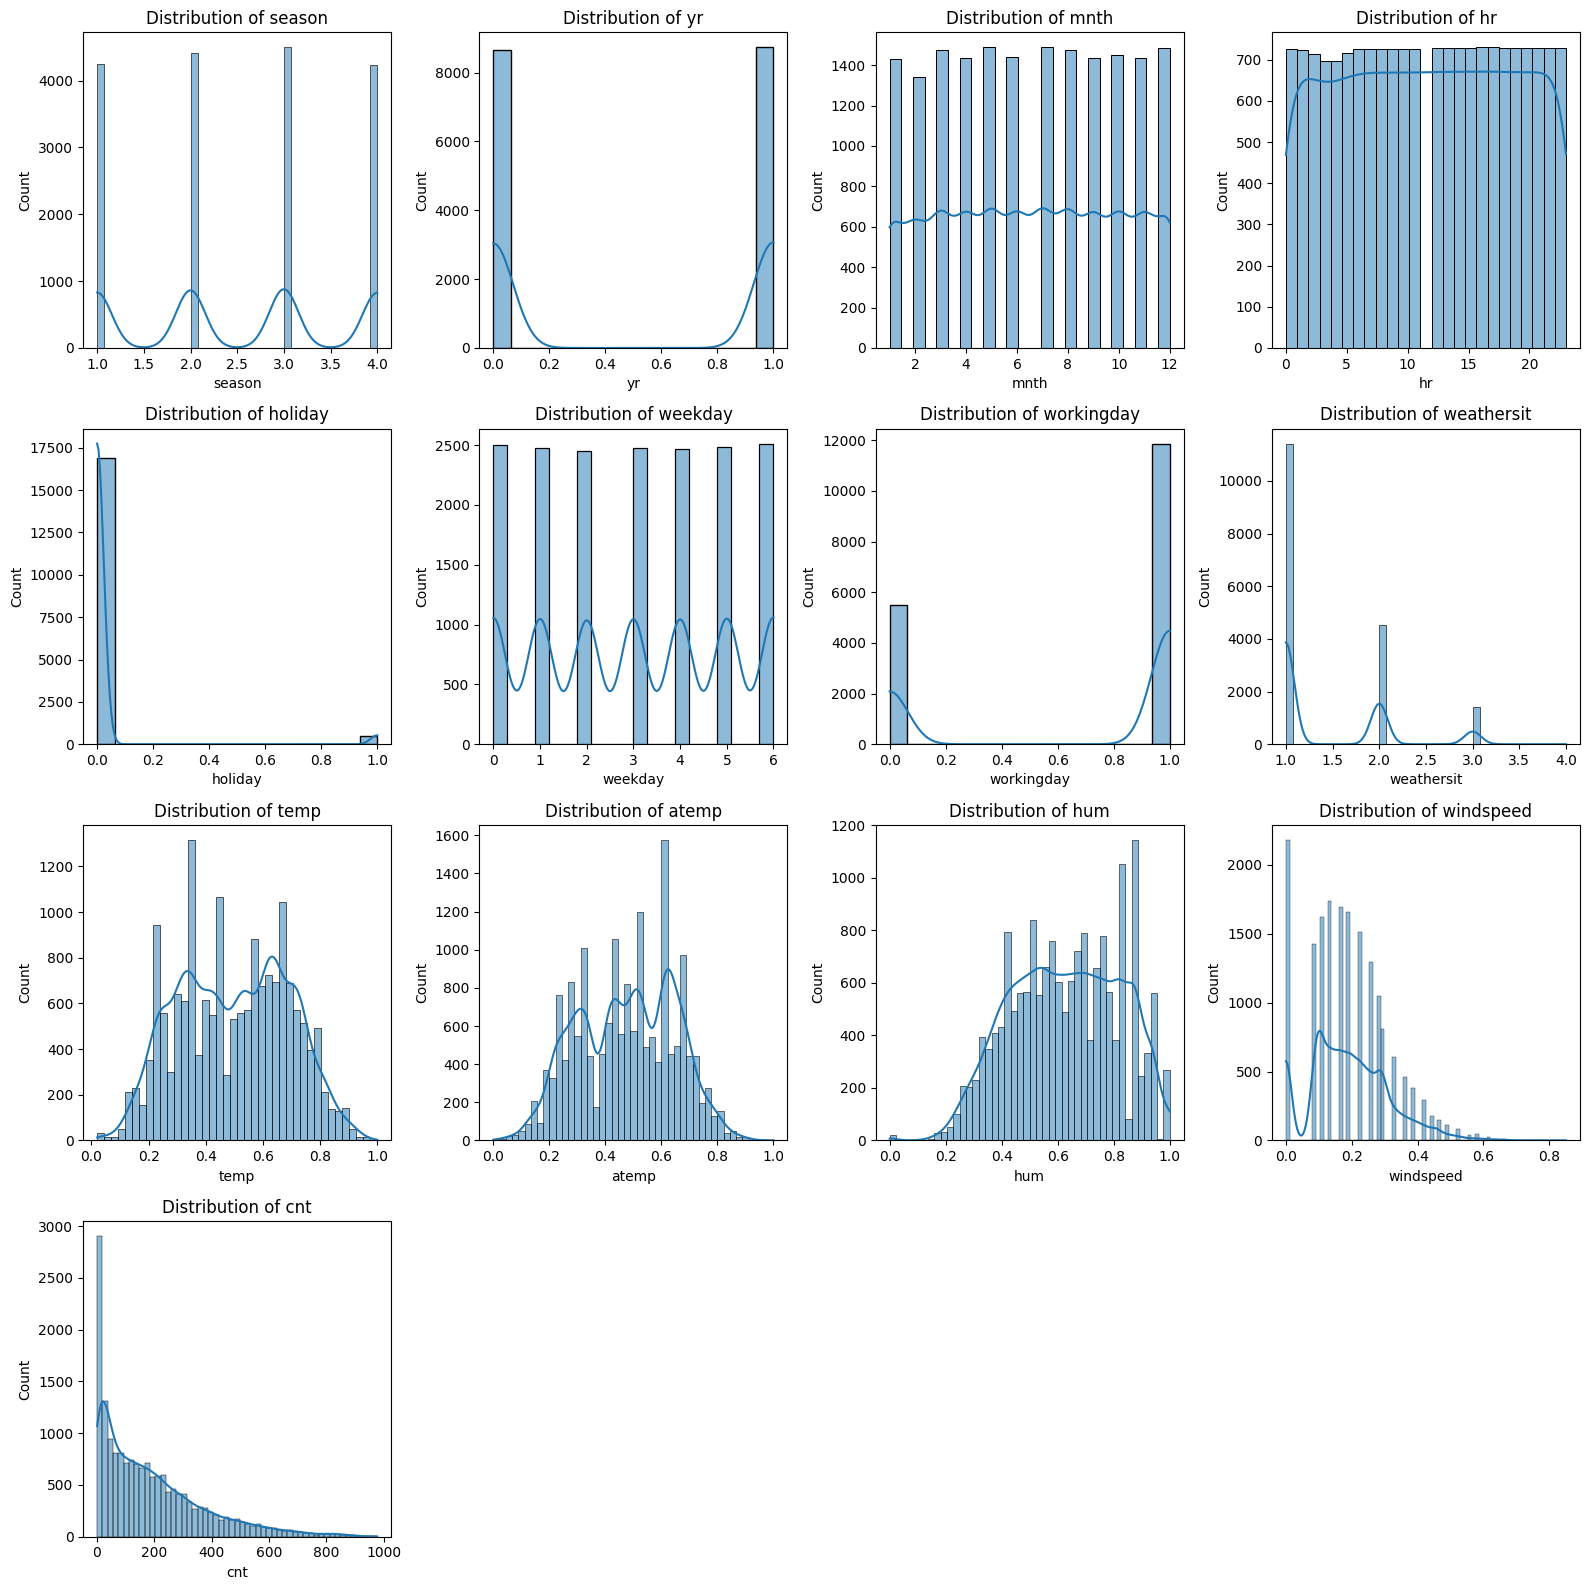

In [1233]:
dispayl_histplot(df_copy)

In [1234]:
# pipleline cell

df_copy = convert_to_category_type(df_copy, ['weekday', 'weathersit', 'mnth', 'season'])

In [1235]:
df_copy

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [1236]:
print_infos(df_copy)

Data info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  int64   
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  int64   
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  int64   
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  cnt         17379 non-null  int64   
dtypes: category(4), float64(4), int64(5)
memory usage: 1.3 MB


None



Data describtion: 



,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,189.463088
std,0.500008,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,181.387599
min,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,1.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,1.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,977.000000


['season', 'mnth', 'weekday', 'weathersit']


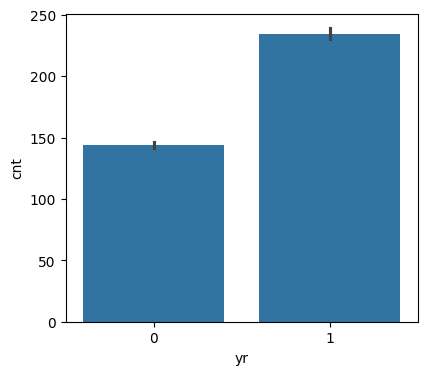

<Figure size 1400x2400 with 0 Axes>

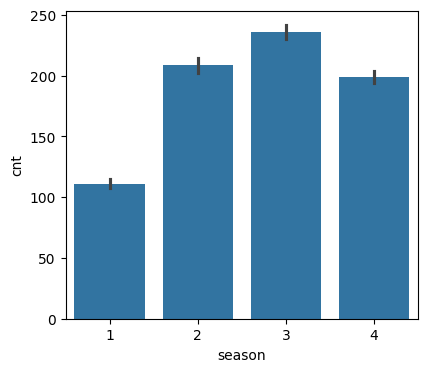

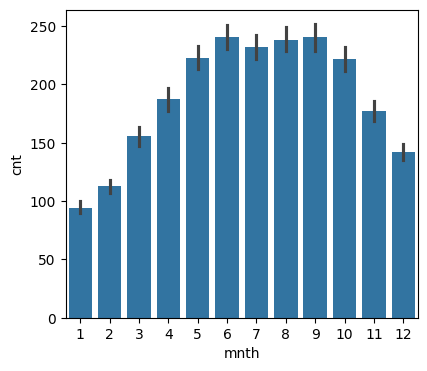

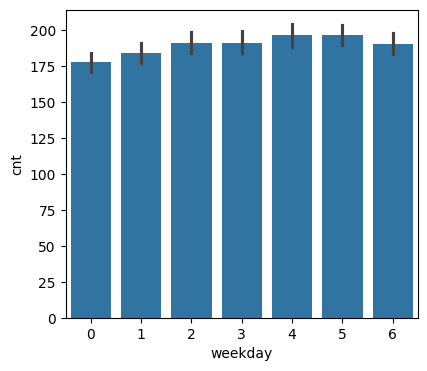

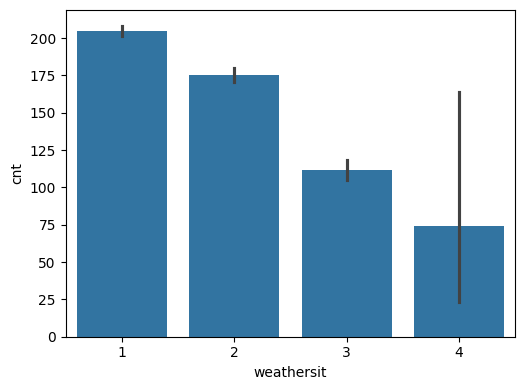

In [1237]:
display_barplot_grid(df_copy)

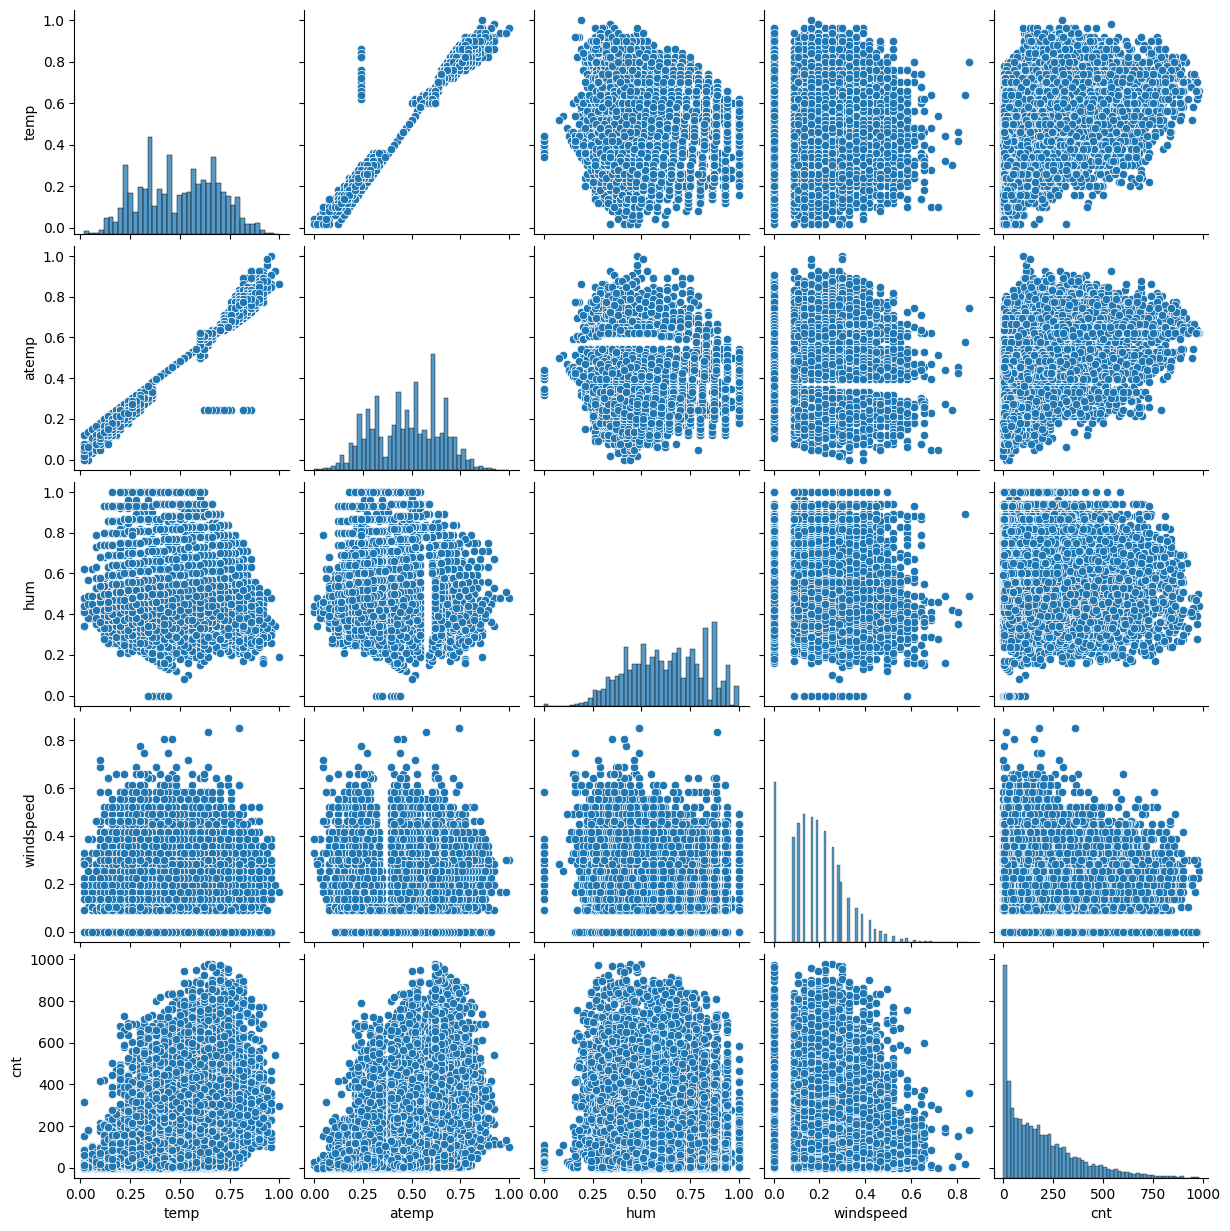

In [1238]:
sns.pairplot(data=df_copy,vars=['temp','atemp','hum','windspeed','cnt'])


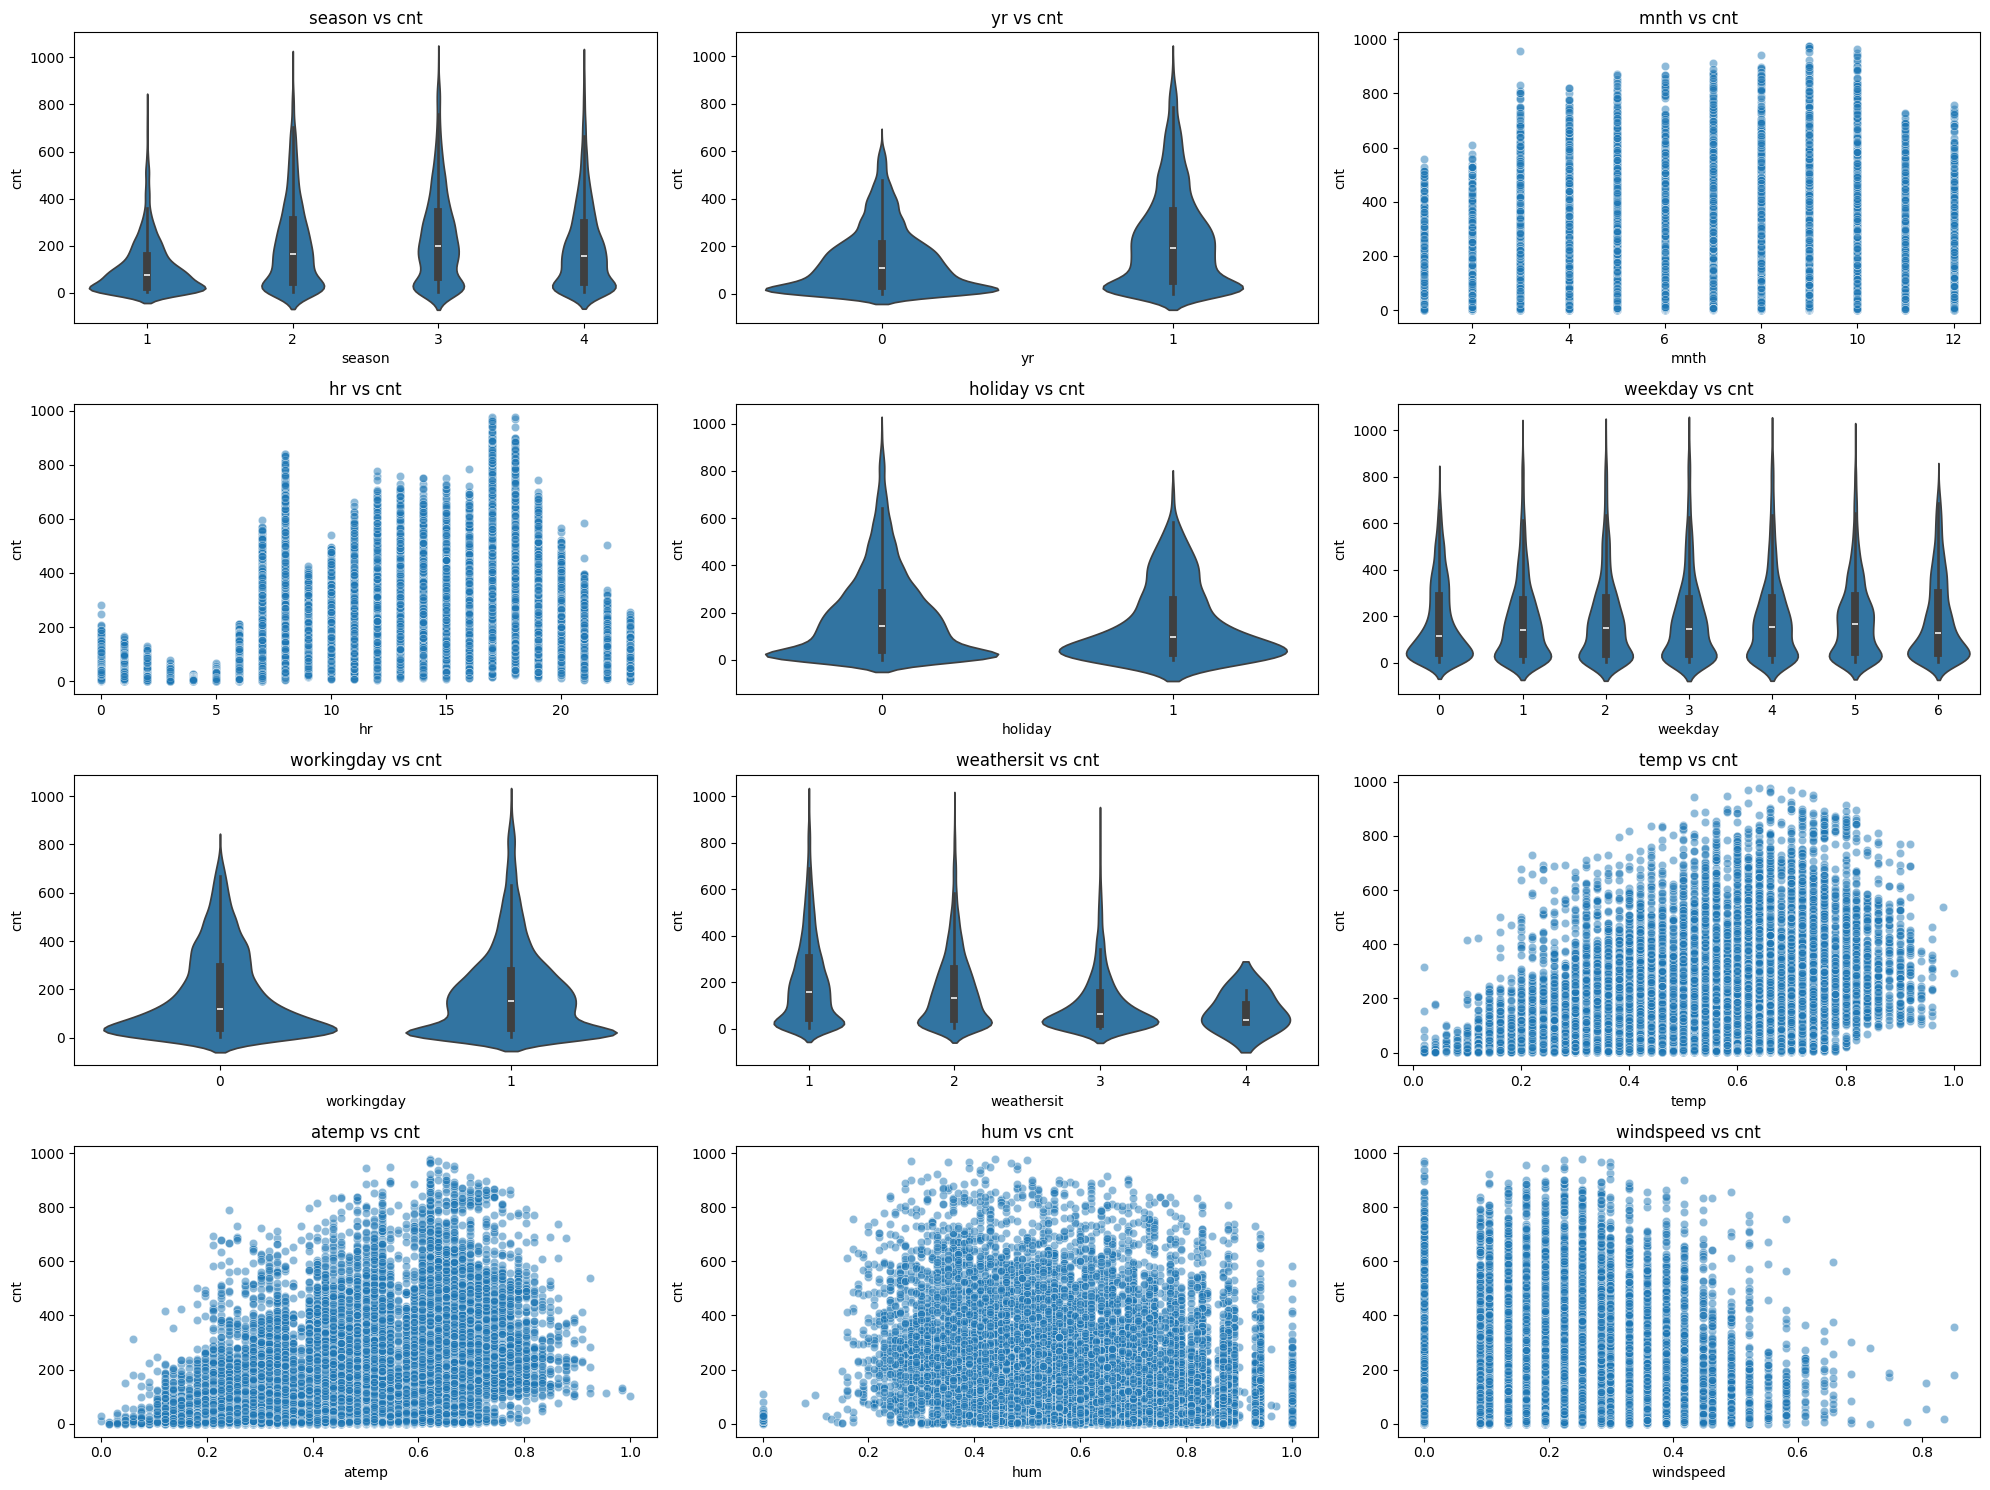

In [1239]:
display_violinplot(df_copy)

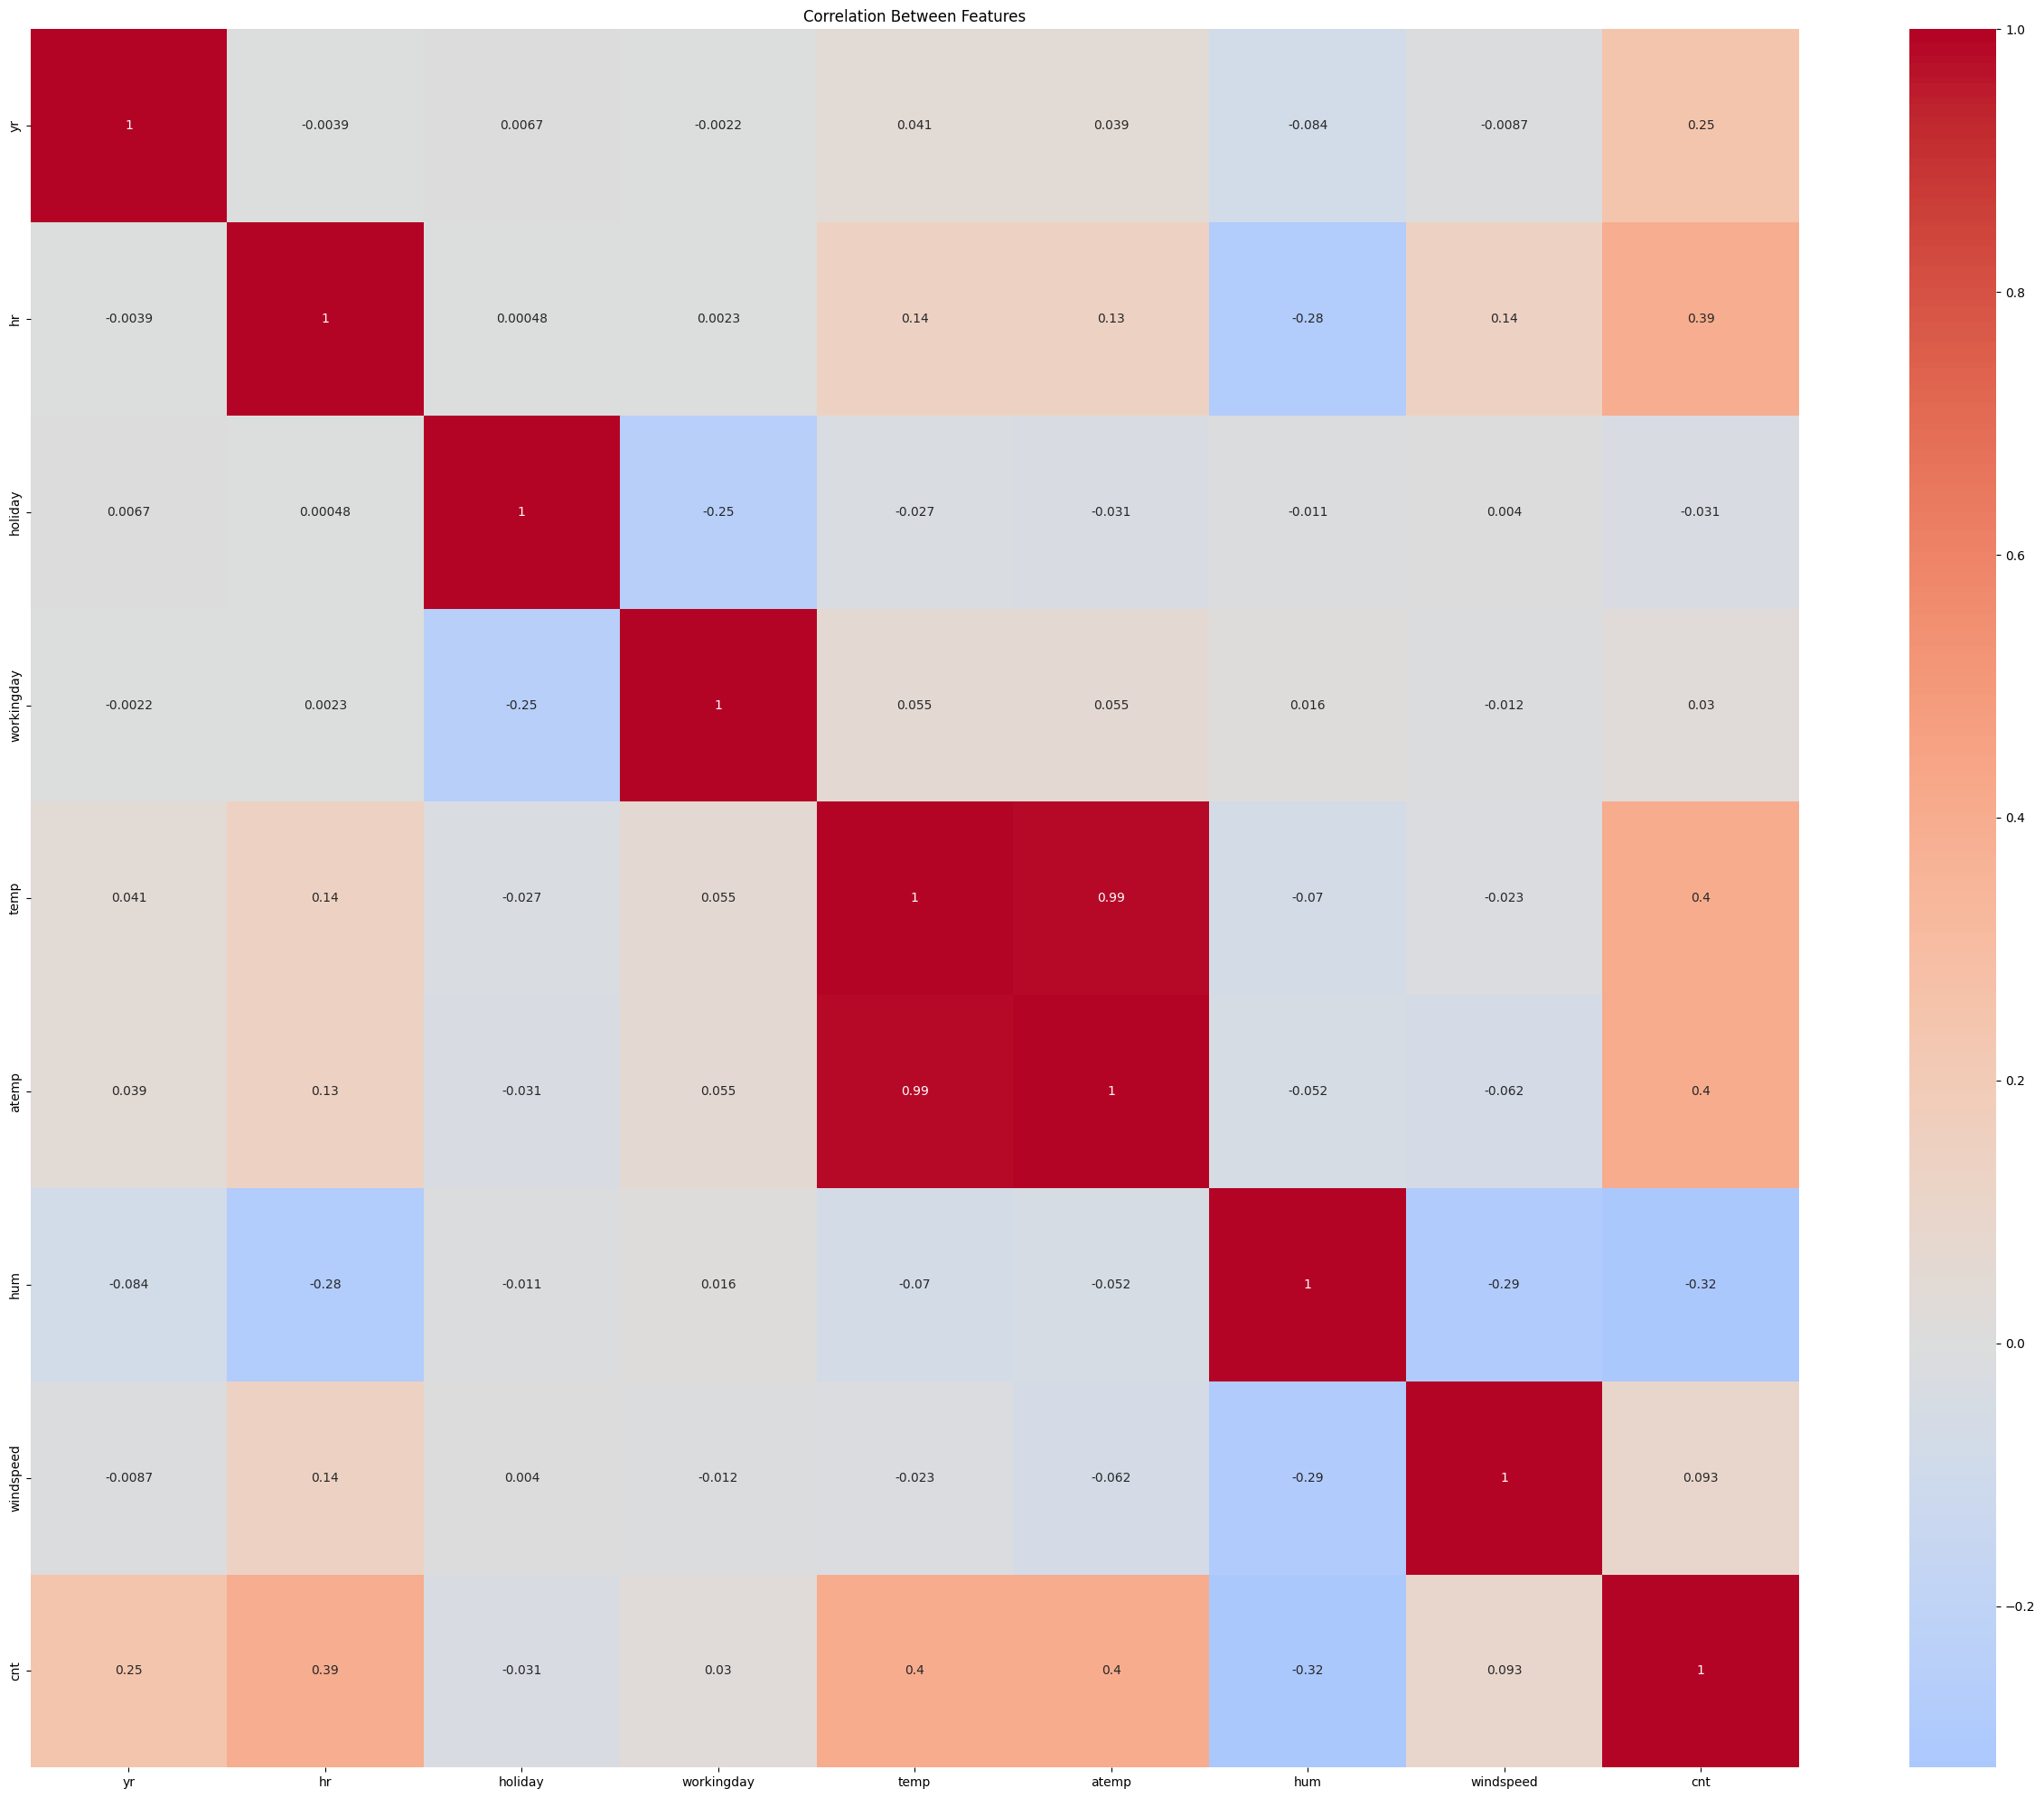

In [1240]:
display_corelation(df_copy)

In [1241]:
df_copy = df_copy.drop('temp', axis=1)

In [1242]:
df_copy = convert_dummies(df_copy)

In [1243]:
df_copy

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0,0.2879,0.81,0.0000,16,True,False,...,False,False,False,False,False,True,True,False,False,False
1,0,1,0,0,0.2727,0.80,0.0000,40,True,False,...,False,False,False,False,False,True,True,False,False,False
2,0,2,0,0,0.2727,0.80,0.0000,32,True,False,...,False,False,False,False,False,True,True,False,False,False
3,0,3,0,0,0.2879,0.75,0.0000,13,True,False,...,False,False,False,False,False,True,True,False,False,False
4,0,4,0,0,0.2879,0.75,0.0000,1,True,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,0.2576,0.60,0.1642,119,True,False,...,True,False,False,False,False,False,False,True,False,False
17375,1,20,0,1,0.2576,0.60,0.1642,89,True,False,...,True,False,False,False,False,False,False,True,False,False
17376,1,21,0,1,0.2576,0.60,0.1642,90,True,False,...,True,False,False,False,False,False,True,False,False,False
17377,1,22,0,1,0.2727,0.56,0.1343,61,True,False,...,True,False,False,False,False,False,True,False,False,False


In [1244]:
scale_num_data(df_copy)
df_copy.head()

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,0.000000,0.0,0.0,0.2879,0.81,0.0,0.015369,True,False,...,False,False,False,False,False,True,True,False,False,False
1,0.0,0.043478,0.0,0.0,0.2727,0.80,0.0,0.039959,True,False,...,False,False,False,False,False,True,True,False,False,False
2,0.0,0.086957,0.0,0.0,0.2727,0.80,0.0,0.031762,True,False,...,False,False,False,False,False,True,True,False,False,False
3,0.0,0.130435,0.0,0.0,0.2879,0.75,0.0,0.012295,True,False,...,False,False,False,False,False,True,True,False,False,False
4,0.0,0.173913,0.0,0.0,0.2879,0.75,0.0,0.000000,True,False,...,False,False,False,False,False,True,True,False,False,False


In [1245]:
print_infos(df_copy)

Data info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  float64
 1   hr            17379 non-null  float64
 2   holiday       17379 non-null  float64
 3   workingday    17379 non-null  float64
 4   atemp         17379 non-null  float64
 5   hum           17379 non-null  float64
 6   windspeed     17379 non-null  float64
 7   cnt           17379 non-null  float64
 8   season_1      17379 non-null  bool   
 9   season_2      17379 non-null  bool   
 10  season_3      17379 non-null  bool   
 11  season_4      17379 non-null  bool   
 12  mnth_1        17379 non-null  bool   
 13  mnth_2        17379 non-null  bool   
 14  mnth_3        17379 non-null  bool   
 15  mnth_4        17379 non-null  bool   
 16  mnth_5        17379 non-null  bool   
 17  mnth_6        17379 non-null  bool   
 18  mnth_7      

None



Data describtion: 



,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,0.502033,0.028770,0.682721,0.475775,0.627229,0.223460,0.193097
std,0.500008,0.300626,0.167165,0.465431,0.171850,0.192930,0.143811,0.185848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.260870,0.000000,0.000000,0.333300,0.480000,0.122840,0.039959
50%,1.000000,0.521739,0.000000,1.000000,0.484800,0.630000,0.228047,0.144467
75%,1.000000,0.782609,0.000000,1.000000,0.621200,0.780000,0.298225,0.286885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


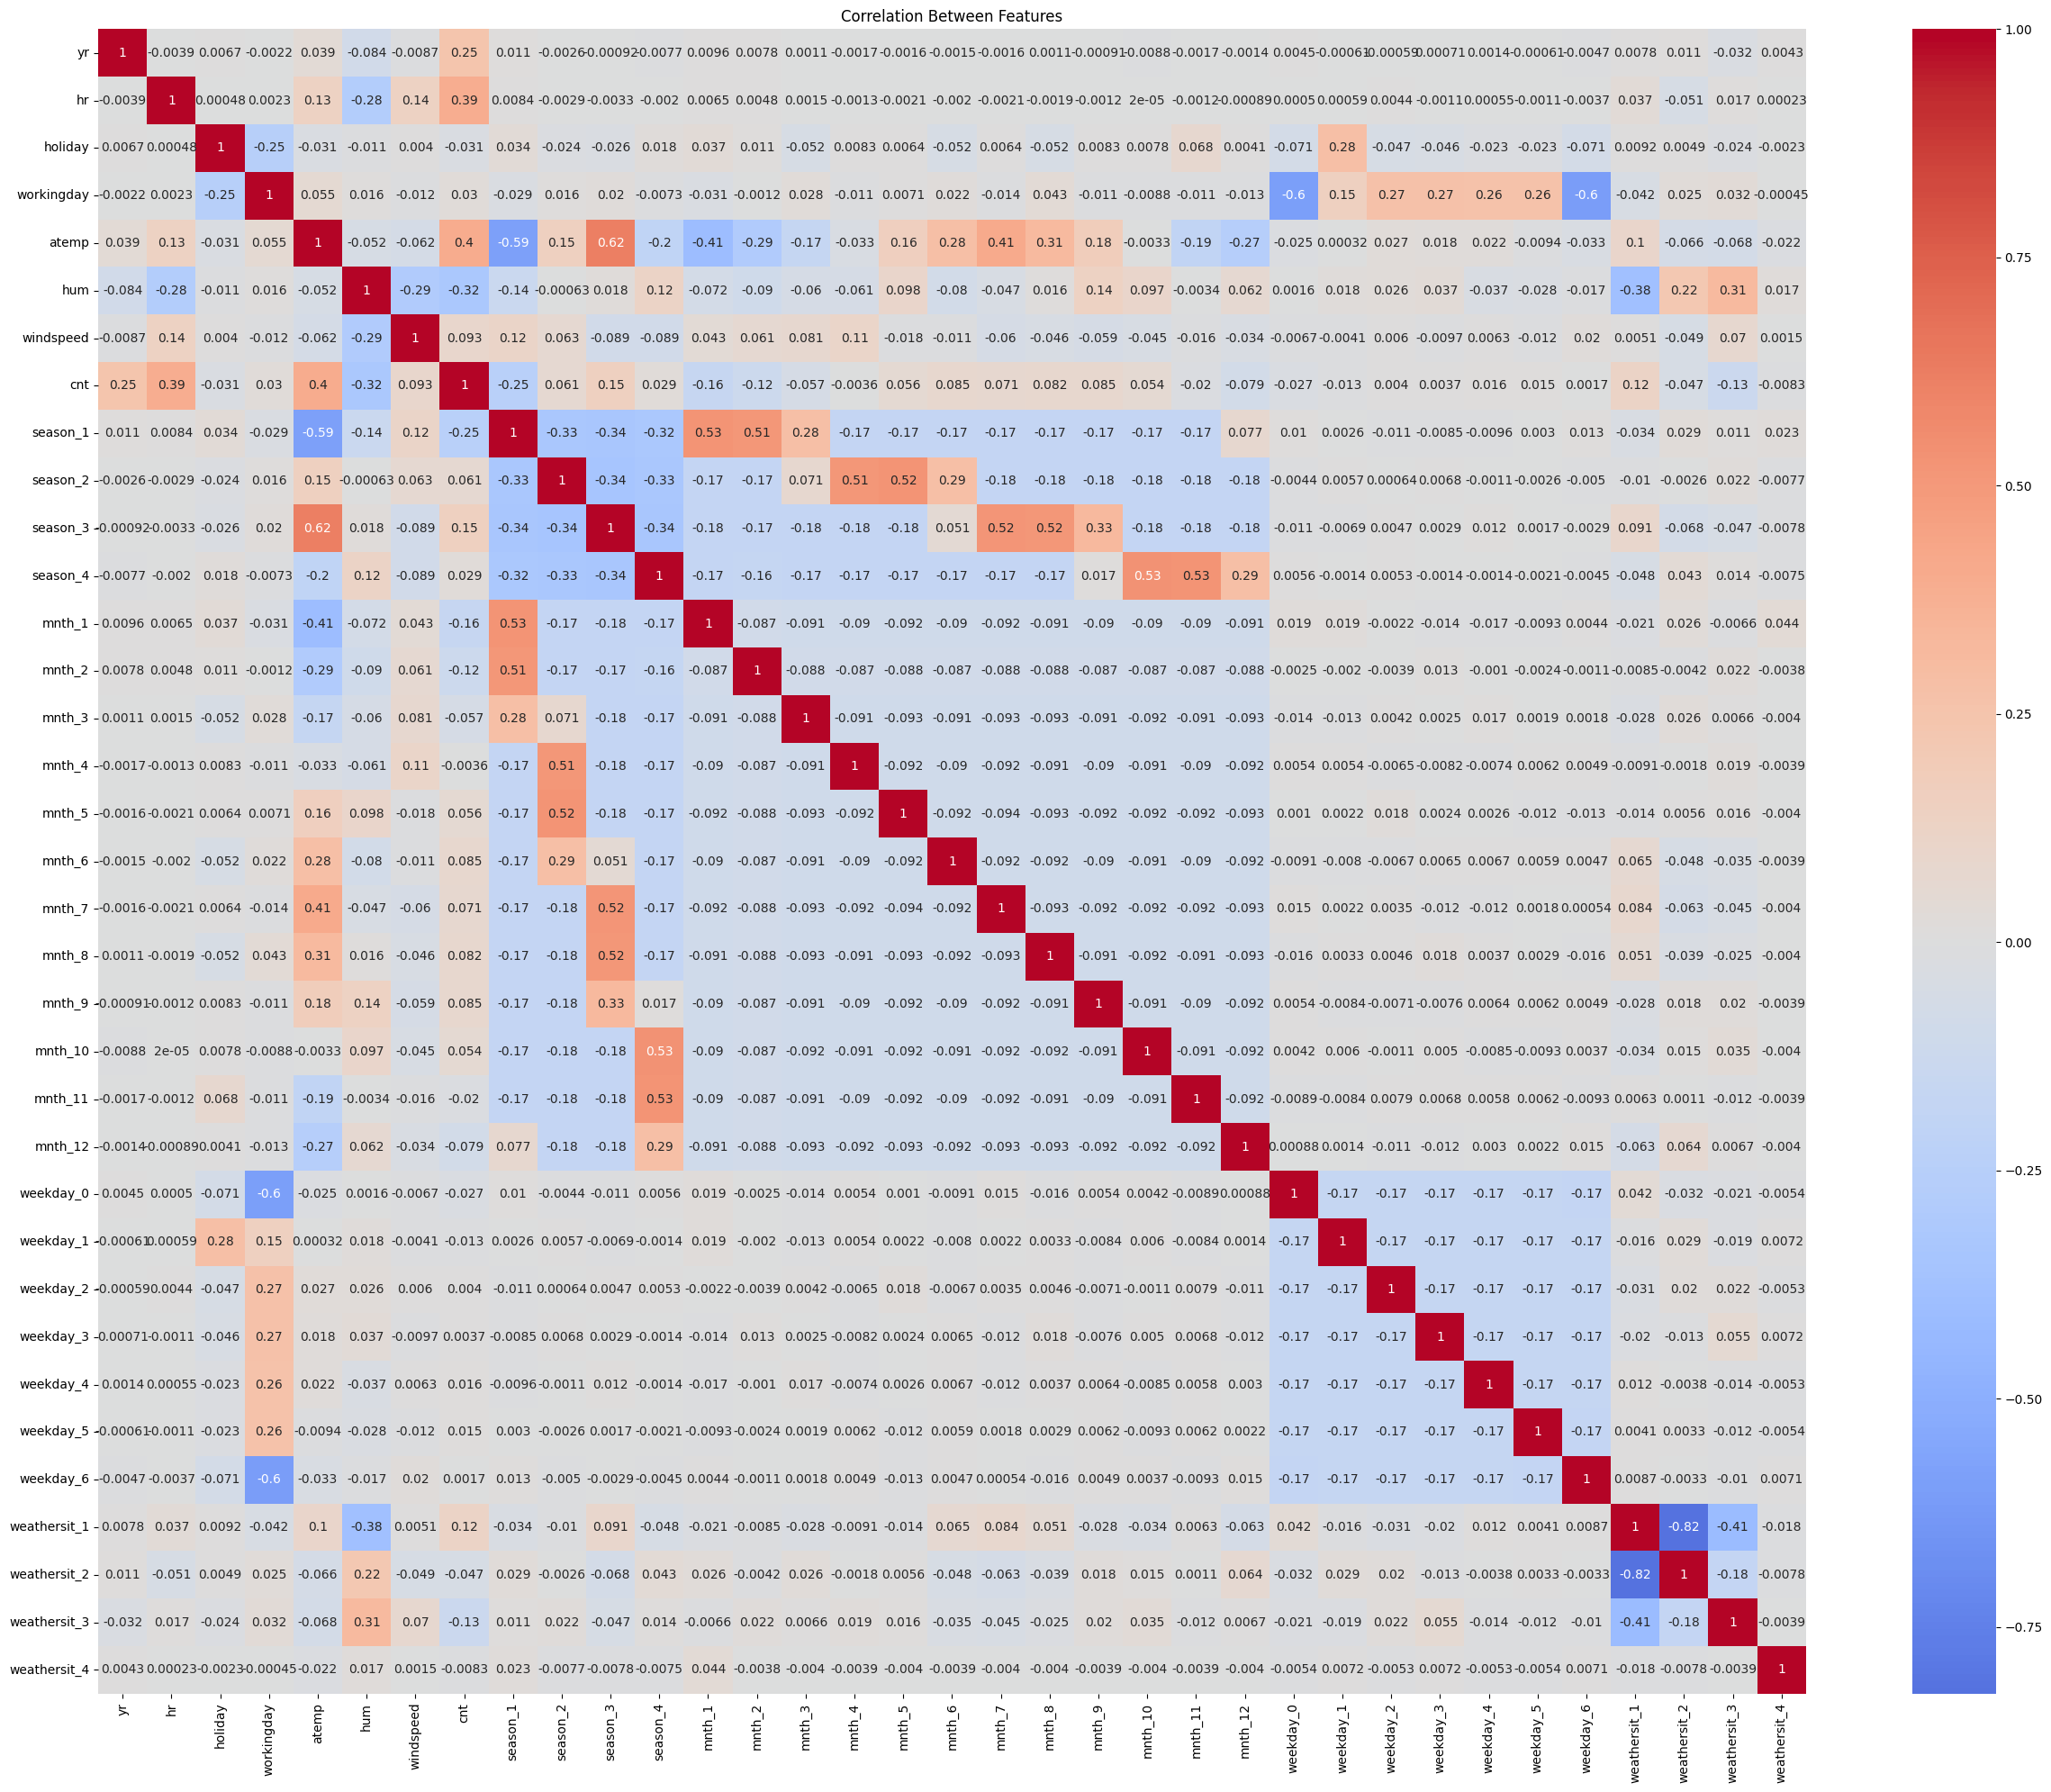

In [1246]:
display_corelation(df_copy)

In [1247]:
# pipleline cell

X_train, X_val, X_test, y_train, y_val, y_test = data_split(df_copy)


In [1248]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12165, 34)
(2607, 34)
(2607, 34)


In [1249]:
X_train

,yr,hr,holiday,workingday,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
781,0.0,0.000000,0.0,0.0,0.2424,0.70,0.193018,True,False,False,...,False,False,False,False,False,True,False,True,False,False
6347,0.0,0.043478,0.0,1.0,0.5455,0.94,0.193018,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4675,0.0,0.739130,0.0,1.0,0.7879,0.49,0.386035,False,False,True,...,True,False,False,False,False,False,True,False,False,False
12011,1.0,0.695652,0.0,0.0,0.6515,0.42,0.421065,False,True,False,...,False,False,False,False,False,False,True,False,False,False
8793,1.0,0.217391,0.0,0.0,0.2727,0.75,0.122840,True,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,1.0,0.434783,0.0,1.0,0.3030,0.45,0.333373,False,False,False,...,False,False,False,True,False,False,True,False,False,False
9766,1.0,0.913043,0.0,1.0,0.3485,0.81,0.122840,True,False,False,...,False,False,False,True,False,False,False,True,False,False
4132,0.0,0.086957,0.0,0.0,0.6212,0.57,0.122840,False,False,True,...,False,False,False,False,False,False,True,False,False,False
17250,1.0,0.652174,0.0,1.0,0.2273,0.87,0.421065,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [1250]:
# pipleline cell
lr_rfe = LinearRegression()
lr_rfe.fit(X_train, y_train)

rfe = RFE(estimator=lr_rfe, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1251]:
# pipleline cell

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('hr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(6)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_1', np.True_, np.int64(1)),
 ('season_2', np.False_, np.int64(9)),
 ('season_3', np.False_, np.int64(2)),
 ('season_4', np.True_, np.int64(1)),
 ('mnth_1', np.False_, np.int64(4)),
 ('mnth_2', np.False_, np.int64(10)),
 ('mnth_3', np.False_, np.int64(12)),
 ('mnth_4', np.False_, np.int64(3)),
 ('mnth_5', np.False_, np.int64(13)),
 ('mnth_6', np.True_, np.int64(1)),
 ('mnth_7', np.True_, np.int64(1)),
 ('mnth_8', np.True_, np.int64(1)),
 ('mnth_9', np.True_, np.int64(1)),
 ('mnth_10', np.True_, np.int64(1)),
 ('mnth_11', np.False_, np.int64(18)),
 ('mnth_12', np.False_, np.int64(8)),
 ('weekday_0', np.False_, np.int64(20)),
 ('weekday_1', np.False_, np.int64(16)),
 ('weekday_2', np.False_, np.int64(14)),
 ('weekday_3', np.False_, np

In [1252]:
# pipleline cell

X_train_rfe = pd.DataFrame(
    rfe.transform(X_train),
    columns=X_train.columns[rfe.support_],
    index=X_train.index
)

In [1253]:
X_train_rfe

,yr,hr,holiday,atemp,hum,windspeed,season_1,season_4,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_3,weathersit_4
781,0.0,0.000000,0.0,0.2424,0.70,0.193018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6347,0.0,0.043478,0.0,0.5455,0.94,0.193018,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4675,0.0,0.739130,0.0,0.7879,0.49,0.386035,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12011,1.0,0.695652,0.0,0.6515,0.42,0.421065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8793,1.0,0.217391,0.0,0.2727,0.75,0.122840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,1.0,0.434783,0.0,0.3030,0.45,0.333373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,1.0,0.913043,0.0,0.3485,0.81,0.122840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4132,0.0,0.086957,0.0,0.6212,0.57,0.122840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17250,1.0,0.652174,0.0,0.2273,0.87,0.421065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1254]:
# pipleline cell

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,16.46
4,hum,8.80
1,hr,4.22
5,windspeed,3.34
7,season_4,2.43
6,season_1,2.11
0,yr,2.00
9,mnth_7,1.83
10,mnth_8,1.68
8,mnth_6,1.62


In [1259]:
df_copy

,yr,hr,holiday,workingday,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,0.000000,0.0,0.0,0.2879,0.81,0.000000,0.015369,True,False,...,False,False,False,False,False,True,True,False,False,False
1,0.0,0.043478,0.0,0.0,0.2727,0.80,0.000000,0.039959,True,False,...,False,False,False,False,False,True,True,False,False,False
2,0.0,0.086957,0.0,0.0,0.2727,0.80,0.000000,0.031762,True,False,...,False,False,False,False,False,True,True,False,False,False
3,0.0,0.130435,0.0,0.0,0.2879,0.75,0.000000,0.012295,True,False,...,False,False,False,False,False,True,True,False,False,False
4,0.0,0.173913,0.0,0.0,0.2879,0.75,0.000000,0.000000,True,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,0.826087,0.0,1.0,0.2576,0.60,0.193018,0.120902,True,False,...,True,False,False,False,False,False,False,True,False,False
17375,1.0,0.869565,0.0,1.0,0.2576,0.60,0.193018,0.090164,True,False,...,True,False,False,False,False,False,False,True,False,False
17376,1.0,0.913043,0.0,1.0,0.2576,0.60,0.193018,0.091189,True,False,...,True,False,False,False,False,False,True,False,False,False
17377,1.0,0.956522,0.0,1.0,0.2727,0.56,0.157870,0.061475,True,False,...,True,False,False,False,False,False,True,False,False,False


In [1260]:
# Check for NaN or infinite values
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("There are NaN or infinite values in your data.")

In [1265]:
constant_columns = [col for col in X_train.columns if X_train[col].var() == 0]
constant_columns
X_train_rfe

,yr,hr,holiday,atemp,hum,windspeed,season_1,season_4,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_3,weathersit_4
781,0.0,0.000000,0.0,0.2424,0.70,0.193018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6347,0.0,0.043478,0.0,0.5455,0.94,0.193018,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4675,0.0,0.739130,0.0,0.7879,0.49,0.386035,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12011,1.0,0.695652,0.0,0.6515,0.42,0.421065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8793,1.0,0.217391,0.0,0.2727,0.75,0.122840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,1.0,0.434783,0.0,0.3030,0.45,0.333373,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,1.0,0.913043,0.0,0.3485,0.81,0.122840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4132,0.0,0.086957,0.0,0.6212,0.57,0.122840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17250,1.0,0.652174,0.0,0.2273,0.87,0.421065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1266]:
pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_train_rfe)

/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
